In [ ]:
from urllib.request import urlopen
from PIL import Image
import timm

In [65]:
import torch

In [66]:
model = timm.create_model('vgg16.tv_in1k', pretrained=True)
model = model.eval()


In [ ]:
img = Image.open(urlopen(
    'https://as2.ftcdn.net/v2/jpg/04/98/82/07/1000_F_498820758_h5nQBIIq4xUdQdfHpUjSLQhyz1UJb16j.jpg'
))

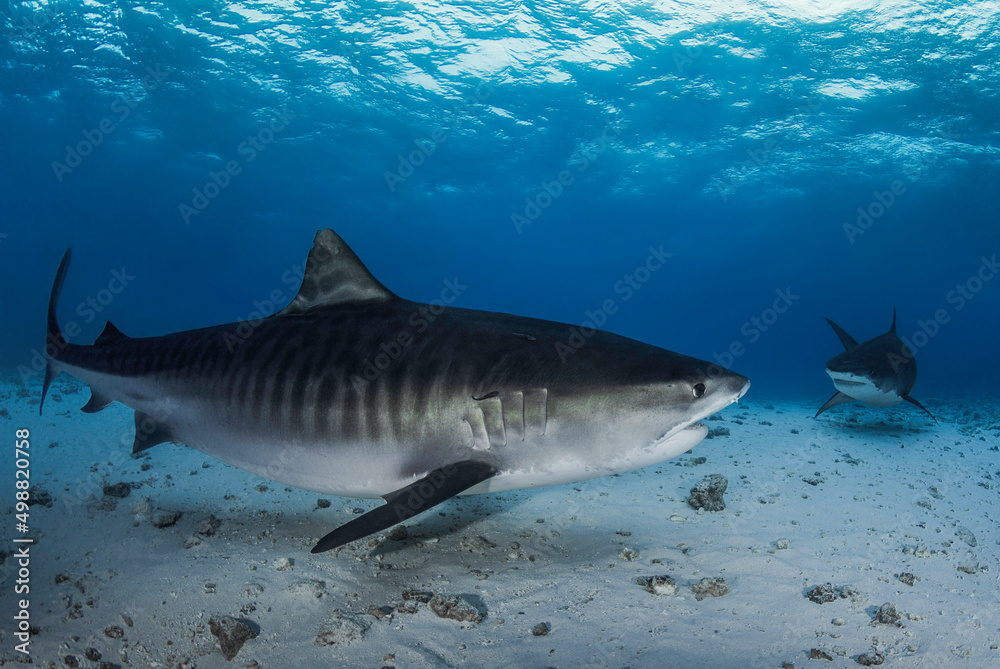

In [68]:
# show image
img.show()


In [69]:
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)
input_tensor = transforms(img).unsqueeze(0)

In [70]:
with torch.no_grad():
    logits = model(input_tensor) 
probabilities = torch.nn.functional.softmax(logits, dim=-1)

In [71]:
print(probabilities.sum())


tensor(1.0000)


NO LABELS PROVIDED! 
However in docs we can see than this model was trained on ImageNet1k.

In [72]:
import requests

In [73]:
url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
imagenet_labels = requests.get(url).json()

In [74]:
display(imagenet_labels)

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead shark',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'American robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'American dipper',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'fire salamander',
 'smooth newt',
 'newt',
 'spotted salamander',
 'axolotl',
 'American bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead sea turtle',
 'leatherback sea turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'green iguana',
 'Carolina anole',
 'desert grassland whiptail lizard',
 'agama',
 'frilled-necked lizard',
 'alligator lizard',
 'Gila monster',
 'European green lizard',
 'chameleon',
 'Komodo dragon',
 'Nile crocodile',
 'American alligator',
 'triceratops',
 'worm snake',
 'ring-necked snake',
 'eastern hog-nosed snake',
 'smooth green snake',
 'kingsnake',
 'garter snake',
 'water snake',
 'vin

In [75]:
predicted_index = torch.argmax(probabilities).item()
predicted_label = imagenet_labels[predicted_index]
print(predicted_label)

tiger shark


In [77]:
def get_label_for_image(image_url: str, model_name: str = 'vgg16'):
    model = timm.create_model(model_name, pretrained=True)
    model.eval()
    
    img = Image.open(urlopen(image_url))
    img.show()
    data_config = timm.data.resolve_model_data_config(model)
    transforms = timm.data.create_transform(**data_config, is_training=False)
    input_tensor = transforms(img).unsqueeze(0)
    
    with torch.no_grad():
        logits = model(input_tensor)
    
    probabilities = torch.nn.functional.softmax(logits[0], dim=0)
    
    url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
    imagenet_labels = requests.get(url).json()
    
    assert len(imagenet_labels) == logits.shape[1], "Mismatch between labels and logits"
    
    predicted_index = torch.argmax(probabilities).item()
    predicted_label = imagenet_labels[predicted_index]
    
    return predicted_label, probabilities[predicted_index].item()



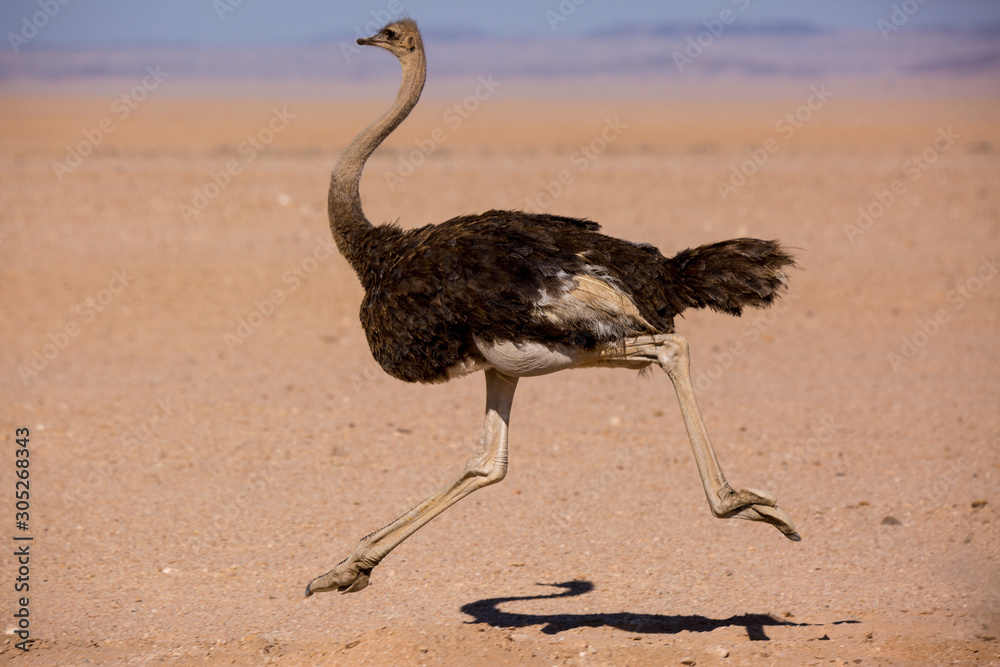

Predicted Label: ostrich with confidence: 99.90%


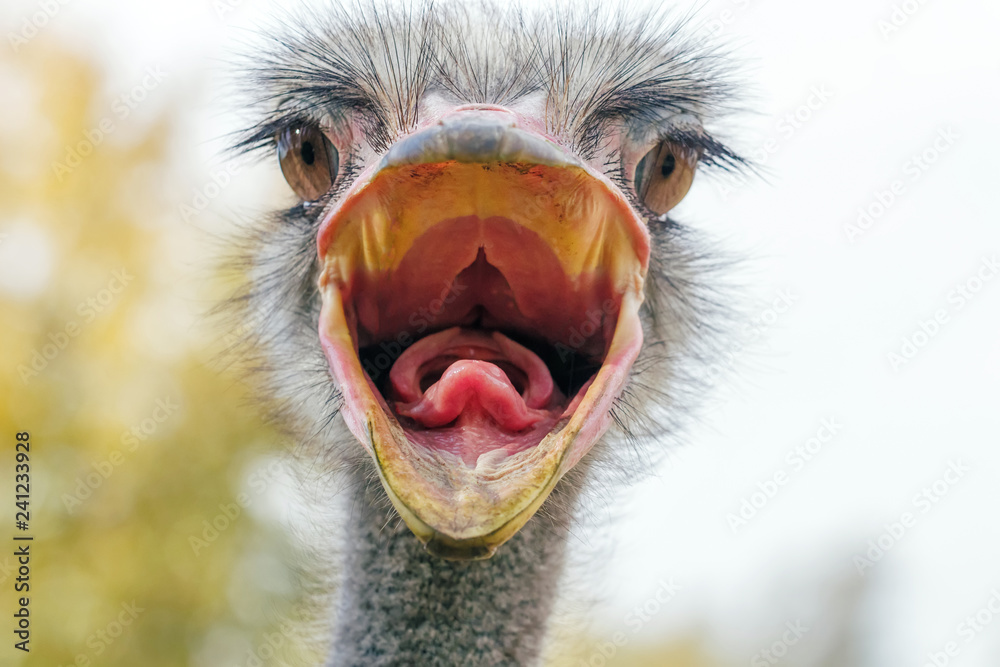

Predicted Label: ostrich with confidence: 100.00%


In [80]:

img_list = [
    'https://as2.ftcdn.net/v2/jpg/03/05/26/83/1000_F_305268343_5Xi5esuvd6mIOqFC0QXZdCcqIWNQ6HR2.jpg',
    'https://as2.ftcdn.net/v2/jpg/02/41/23/39/1000_F_241233928_3UtxKpchsTSbR4iJG9j8xSRYh3I8MyzG.jpg'
]

for image_url in img_list:
    label, confidence = get_label_for_image(image_url)
    print(f"Predicted Label: {label} with confidence: {confidence * 100:.2f}%")
